## Heart disease detection project

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./Data/heart.csv')

In [9]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<p>The data is already clean. It is ready for the analysis</p>

In [33]:
df.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [45]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [51]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [55]:
#sns.pairplot(df, hue='target')

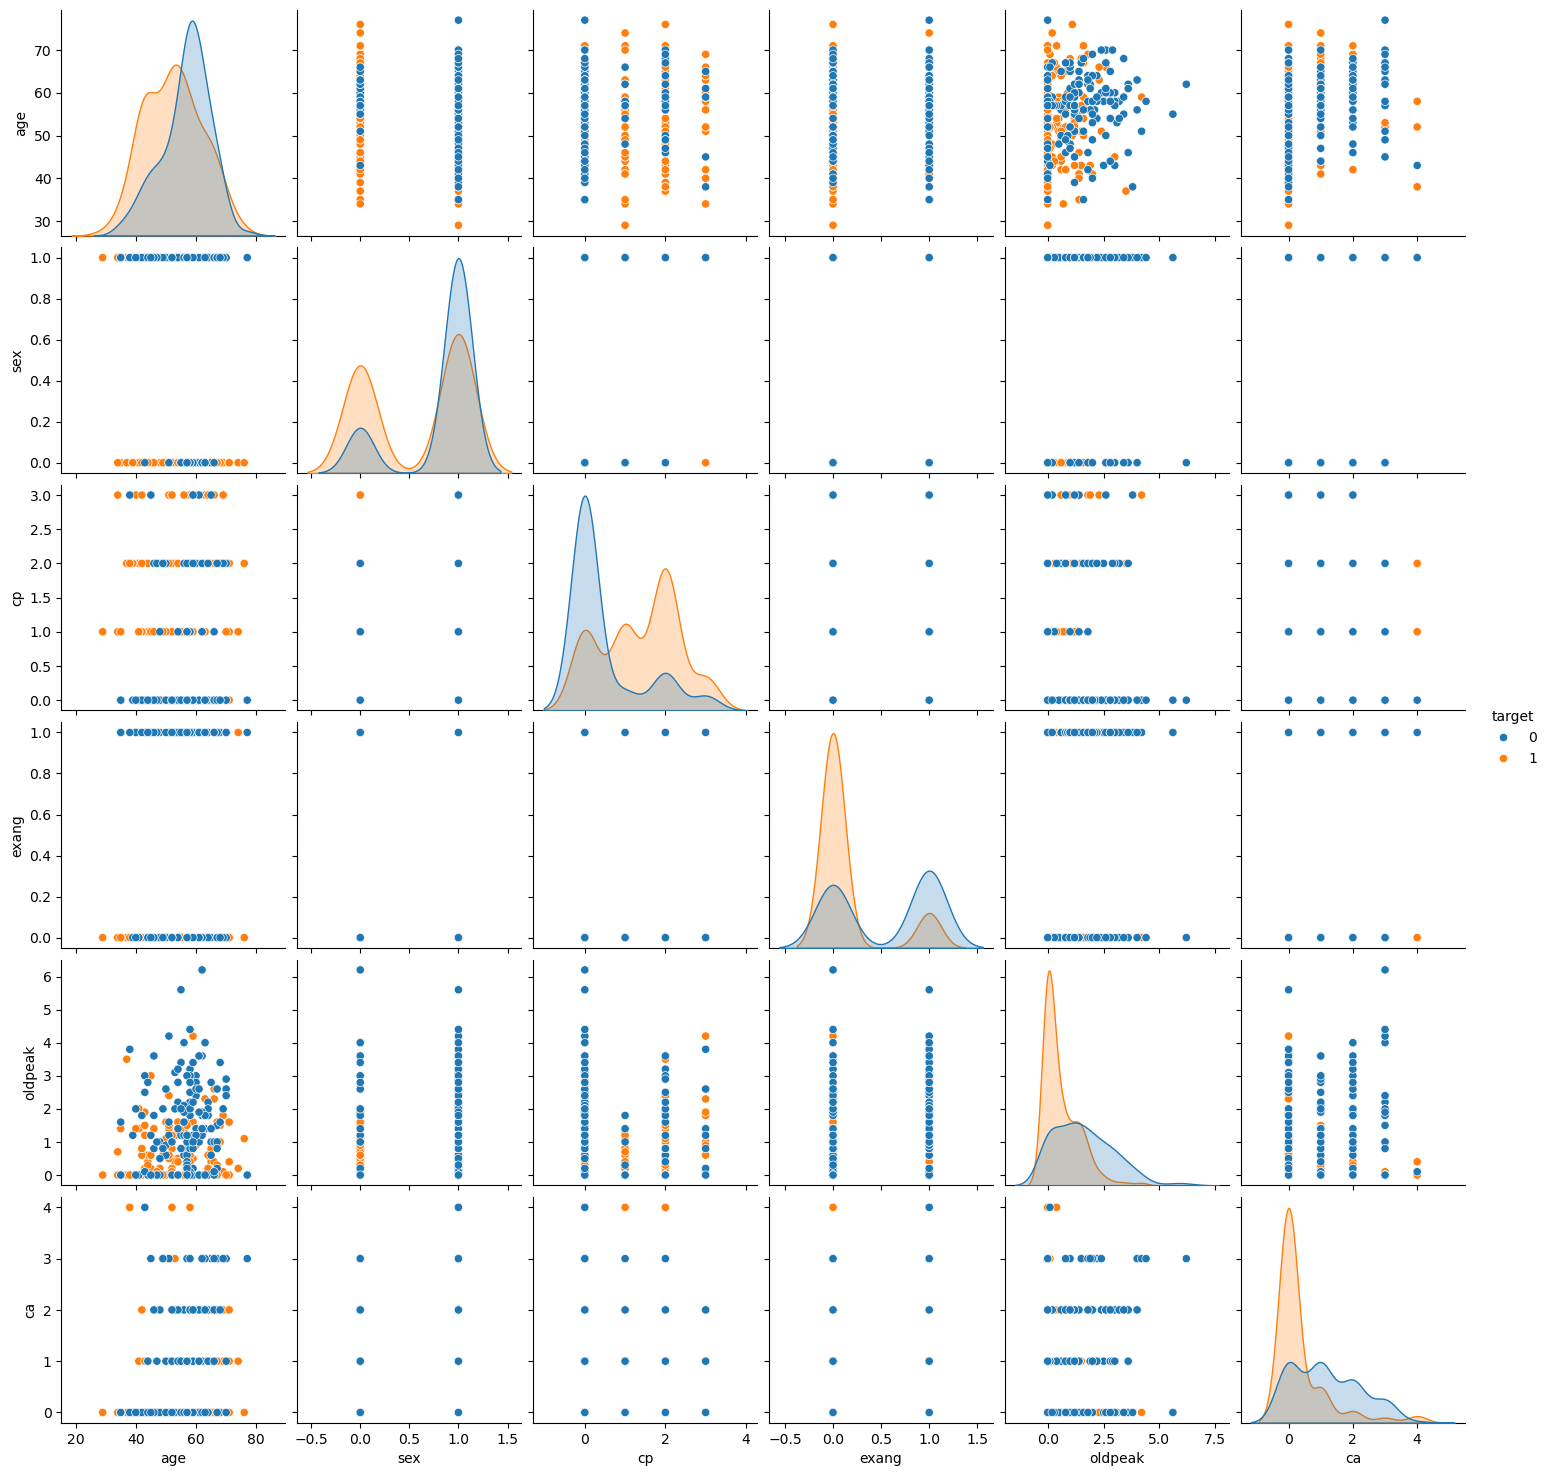

In [53]:
sns.pairplot(df[['age','sex','cp','exang', 'oldpeak','ca','target']], hue='target')

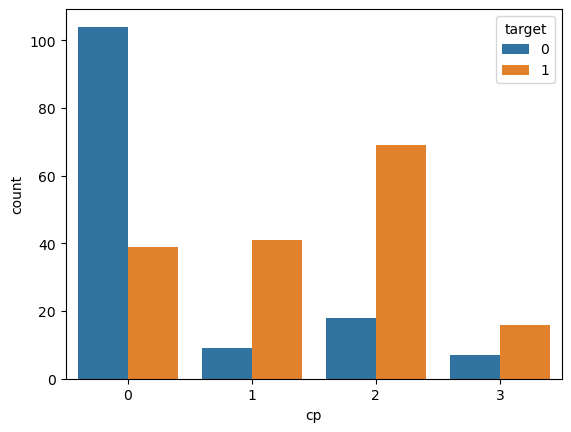

In [66]:
sns.countplot(data=df, x='cp', hue='target');

<Axes: xlabel='target', ylabel='age'>

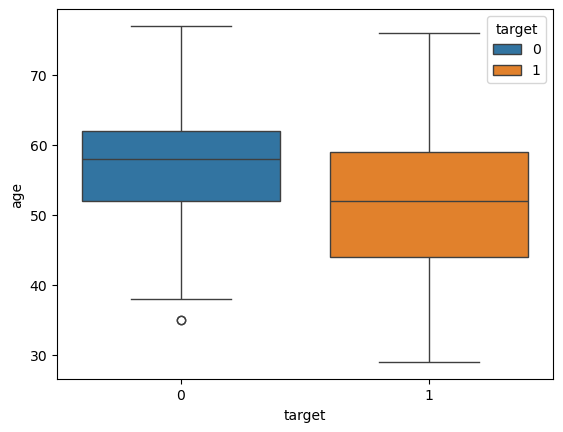

In [62]:
sns.boxplot(df, y='age', x='target', hue='target')

In [72]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='Density'>

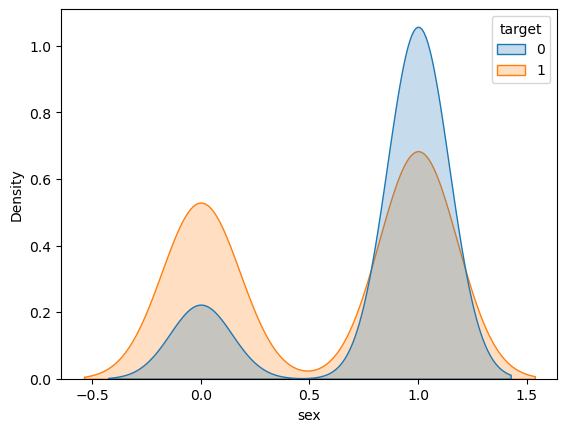

In [76]:
sns.kdeplot(df, x='sex', hue='target', fill=True)

<Axes: xlabel='exang', ylabel='count'>

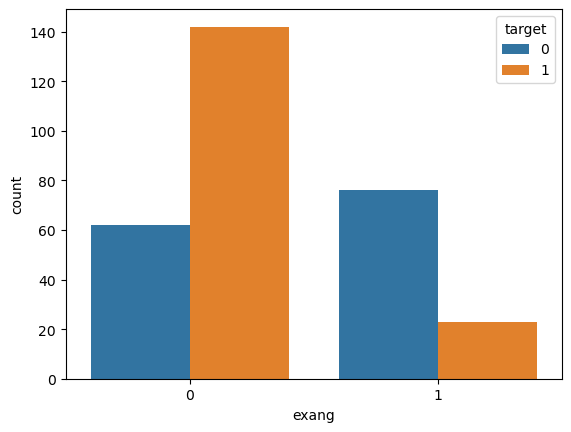

In [88]:
sns.countplot(df, x='exang', hue='target')

<Axes: xlabel='target', ylabel='oldpeak'>

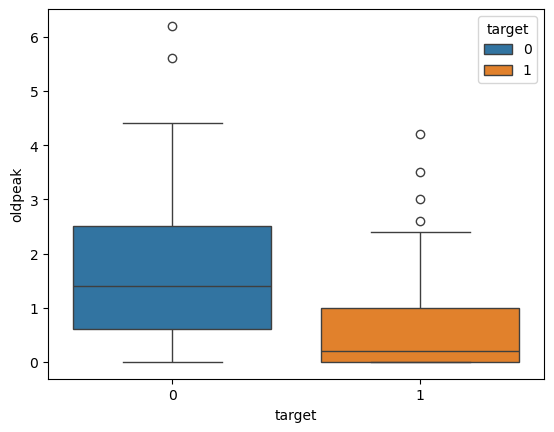

In [98]:
sns.boxplot(df, y='oldpeak', x='target', hue='target')

In [100]:
df['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

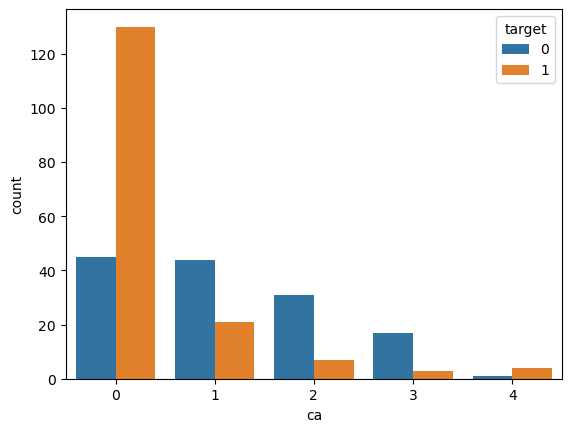

In [105]:
sns.countplot(df, x='ca', hue='target')

In [154]:
#df.head()

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [131]:
X = df.drop('target', axis=1)

In [135]:
y = df['target']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [146]:
scaler = StandardScaler()

In [148]:
scaleX_train = scaler.fit_transform(X_train)

In [150]:
scaleX_test = scaler.transform(X_test)

In [152]:
basic_model = LogisticRegression(solver='saga', max_iter=5000)

In [168]:
C = np.logspace(0.001,100,20)
l1_ratio = np.linspace(0,1,10)

param = [{'penalty':['l2','l1'], 'C':C},
         {'penalty':['elasticnet'], 'l1_ratio':l1_ratio, 'C':C}]

In [170]:
grid_model = GridSearchCV(basic_model,param_grid=param)

In [172]:
grid_model.fit(scaleX_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid=[{'C': array([1.00230524e+000, 1.83698353e+005, 3.36674735e+010, 6.17043511e+015,
       1.13089179e+021, 2.07265165e+026, 3.79867011e+031, 6.96204526e+036,
       1.27597482e+042, 2.33855382e+047, 4.28600459e+052, 7.85521172e+057,
       1.43967067e+063, 2.63856879e+068, 4.83585961e+073, 8.86296323e+078...
       1.13089179e+021, 2.07265165e+026, 3.79867011e+031, 6.96204526e+036,
       1.27597482e+042, 2.33855382e+047, 4.28600459e+052, 7.85521172e+057,
       1.43967067e+063, 2.63856879e+068, 4.83585961e+073, 8.86296323e+078,
       1.62436720e+084, 2.97707293e+089, 5.45625598e+094, 1.00000000e+100]),
                          'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'penalty': ['elasticnet']}])

In [174]:
grid_model.best_params_

{'C': 1.0023052380778996, 'penalty': 'l1'}

In [176]:
grid_model.best_estimator_

LogisticRegression(C=1.0023052380778996, max_iter=5000, penalty='l1',
                   solver='saga')

In [187]:
y_pred = grid_model.predict(scaleX_test)

In [218]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [189]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.8681318681318682


In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.82      0.93      0.88        45

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [216]:
confusion_matrix(y_test, y_pred)

array([[37,  9],
       [ 3, 42]], dtype=int64)

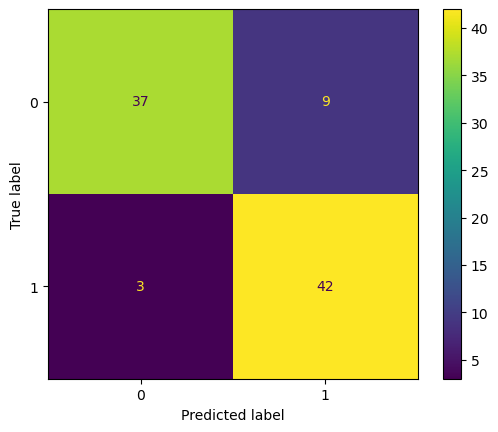

In [222]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);